# Partition of feature space by random forest

In [58]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import load_boston, load_iris, load_wine, load_digits, \
                             load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
#%config InlineBackend.figure_format = 'svg'
%config InlineBackend.figure_format = 'retina'

from rfpimp import *   # pip install rfpimp

from sklearn import tree
from dtreeviz.trees import *
from dtreeviz.forests import *
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree

## Decision tree and random forest for wine data set

In [59]:
wine = load_wine()
X = wine.data
X = X[:,[12,6]]
y = wine.target
len(X), len(y)

colors = {'classes':
          [None, # 0 classes
          None, # 1 class
          ["#FEFEBB","#a1dab4"], # 2 classes
          ["#FEFEBB","#D9E6F5",'#a1dab4'], # 3
          ]
         }

feature_c_bivar = ['proline','flavanoid']
target_c_bivar = "wine"
class_name_bivar = list(wine.target_names)
feature_c_bivar, target_c_bivar,  class_name_bivar

(['proline', 'flavanoid'], 'wine', ['class_0', 'class_1', 'class_2'])

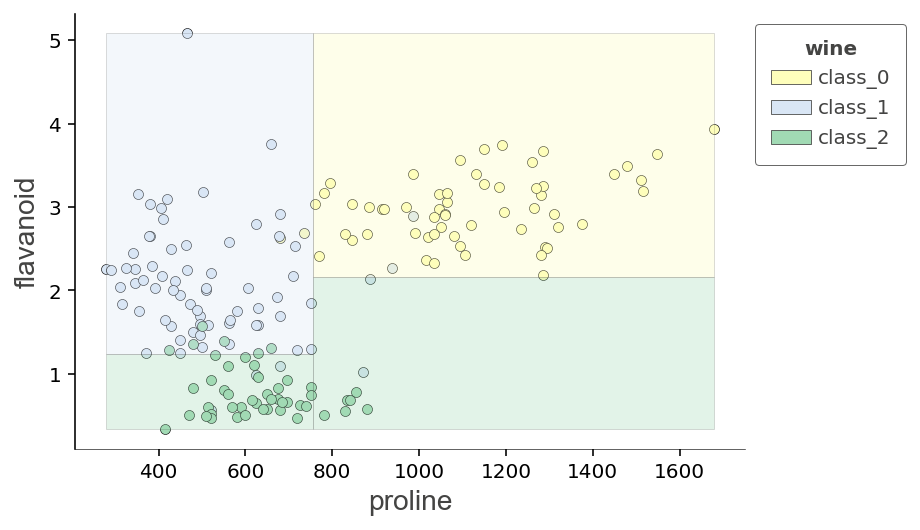

In [60]:
dtc_bivar = DecisionTreeClassifier(max_depth=2)
dtc_bivar.fit(X, y)

ctreeviz_bivar(dtc_bivar, X, y, 
               feature_names=feature_c_bivar, target_name=target_c_bivar, class_names=class_name_bivar,
               show={'splits', "legend"}, 
               colors={'scatter_edge': 'black'})

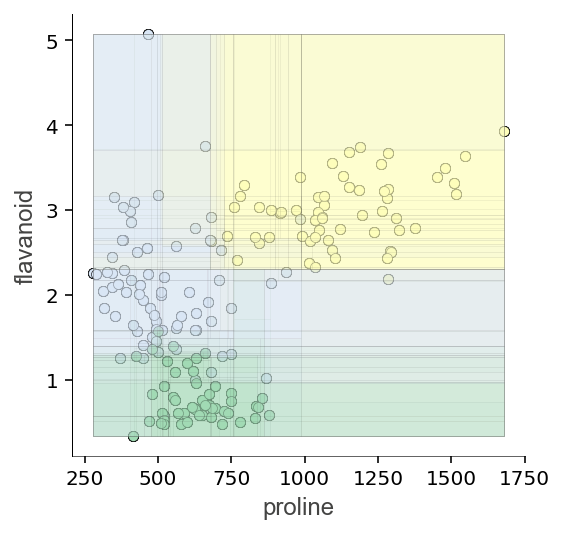

In [61]:
rf = RandomForestClassifier(n_estimators=10, min_samples_leaf=3, n_jobs=-1)
rf.fit(X, y)

fig, ax = plt.subplots(1,1, figsize=(4,3.8))
ctreeviz_bivar_fusion(rf.estimators_, X, y,
                      feature_names=['proline', 'flavanoid'], target_name="wine",
                      class_names=None,
                      alpha=.1,
                      ax=ax)
plt.tight_layout()
plt.show()

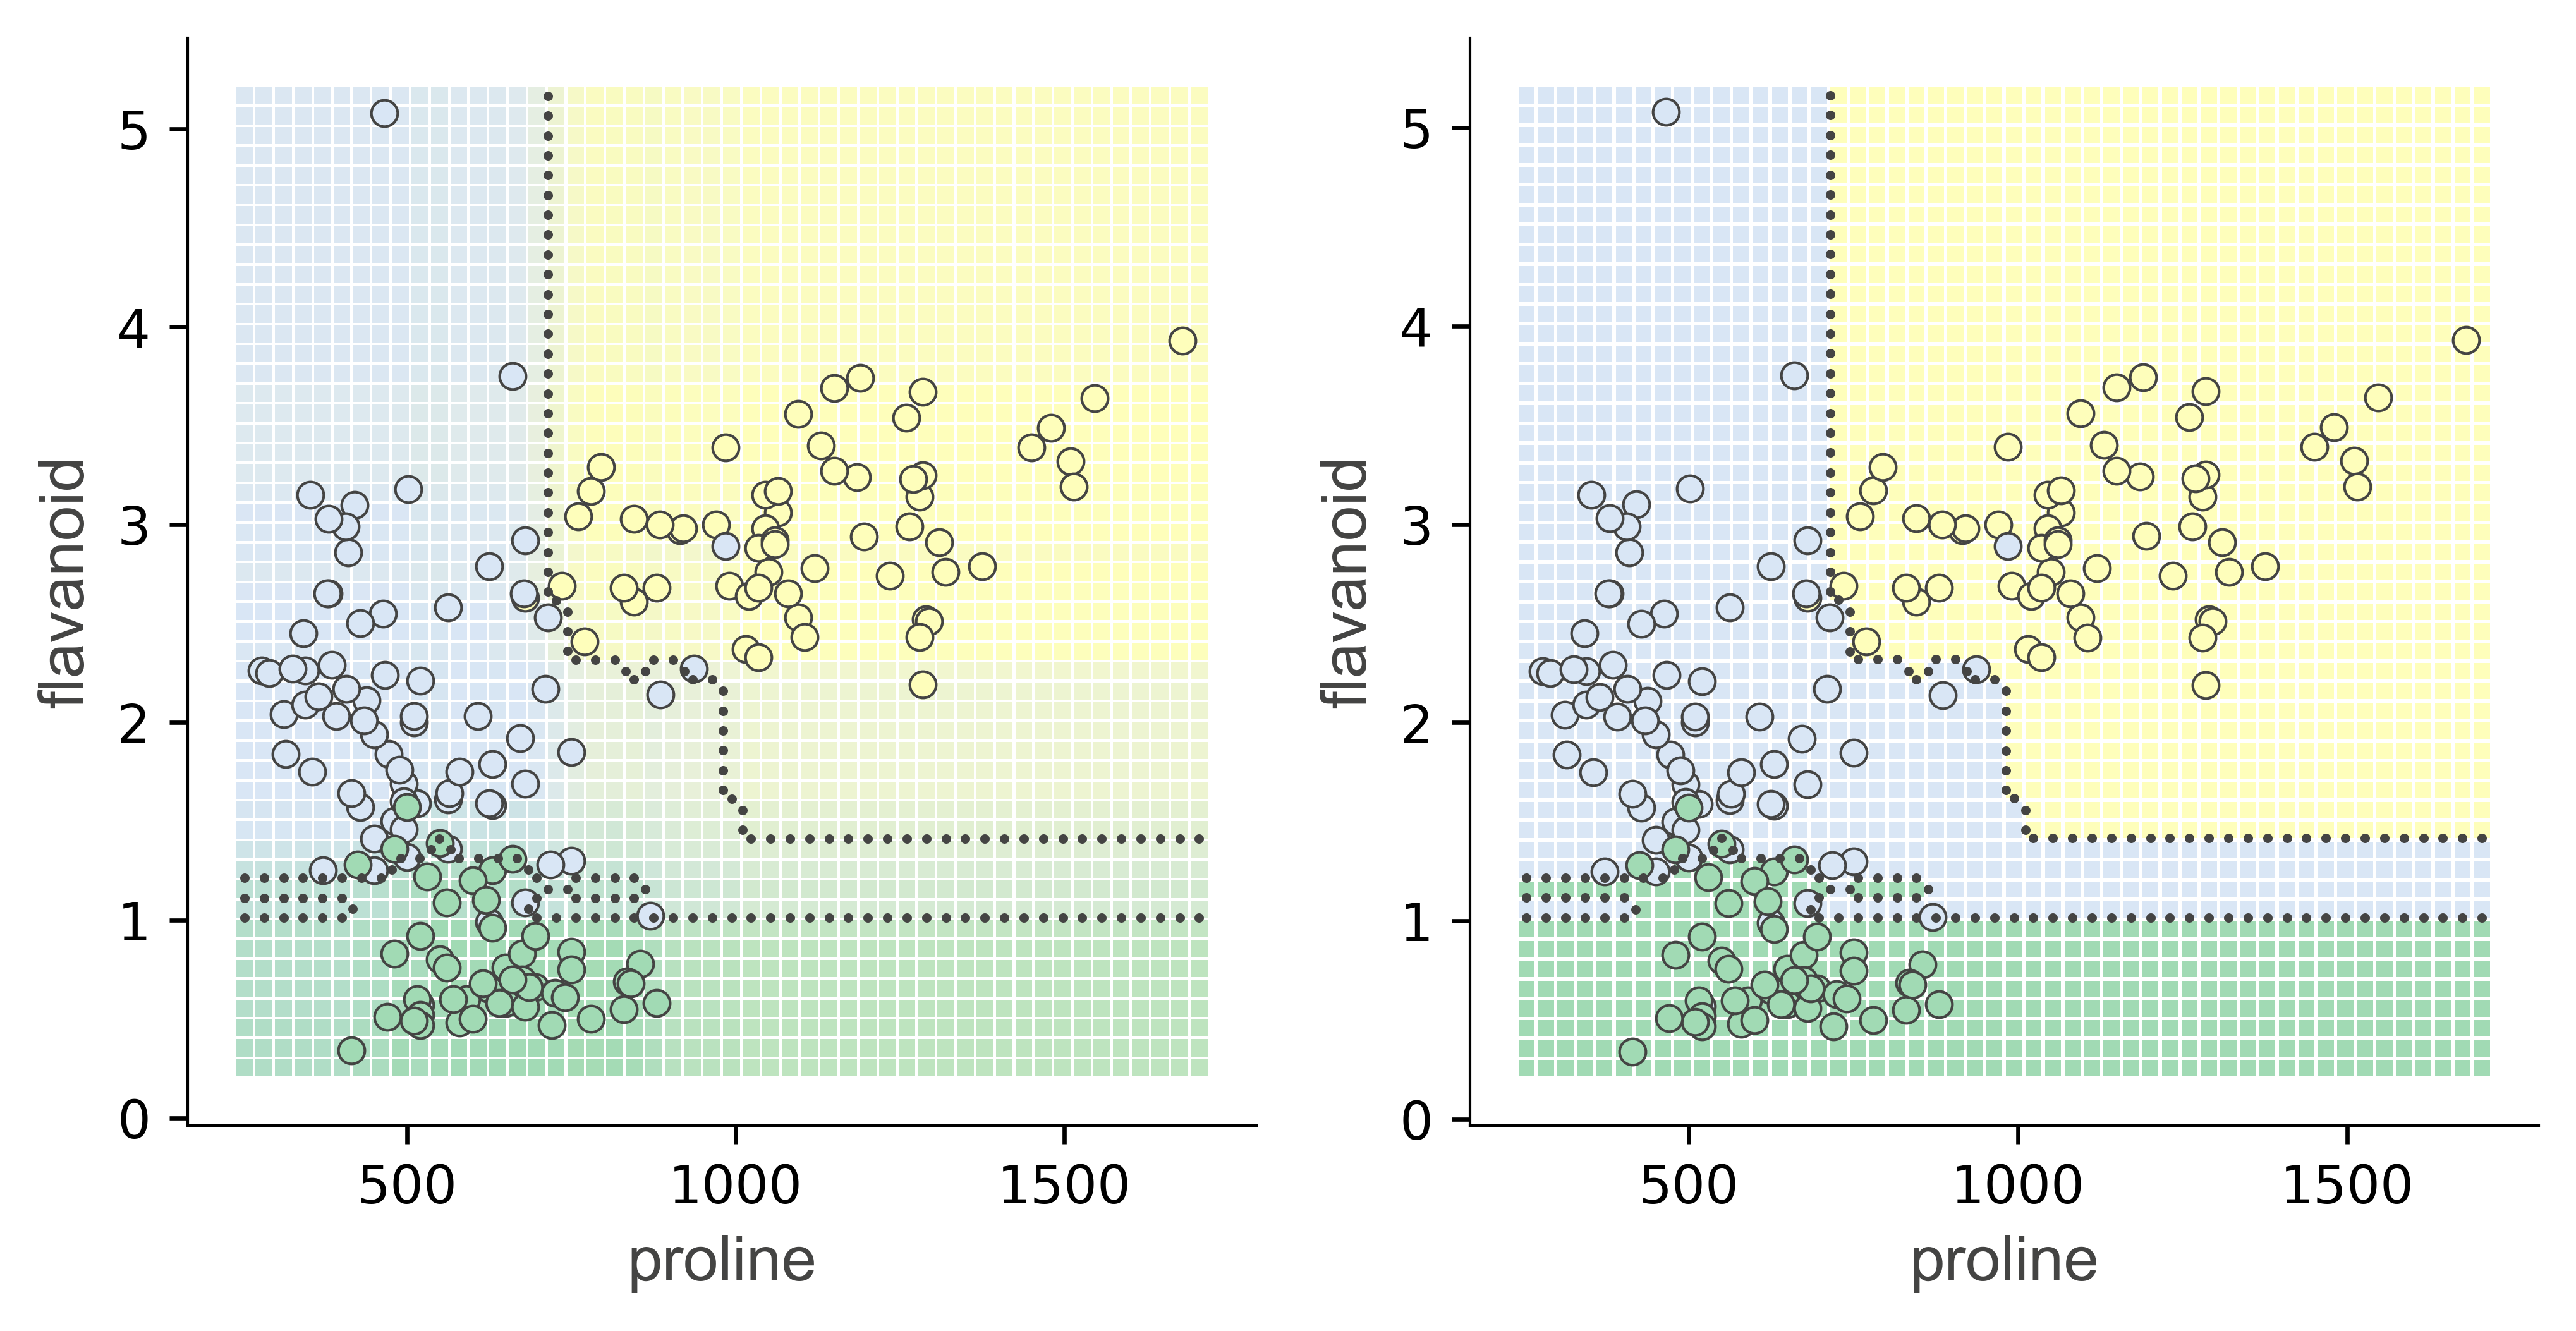

In [62]:
rf = RandomForestClassifier(n_estimators=50, min_samples_leaf=2, n_jobs=-1)
rf.fit(X, y)

fig,axes = plt.subplots(1,2, figsize=(8,3.8), dpi=300)
crfviz_bivar(rf, X, y, ntiles=50, ax=axes[0], tile_fraction=.9, show_proba=True, feature_names=['proline', 'flavanoid'])
crfviz_bivar(rf, X, y, ntiles=50, ax=axes[1], tile_fraction=.85, show_proba=False, feature_names=['proline', 'flavanoid'])
plt.show()

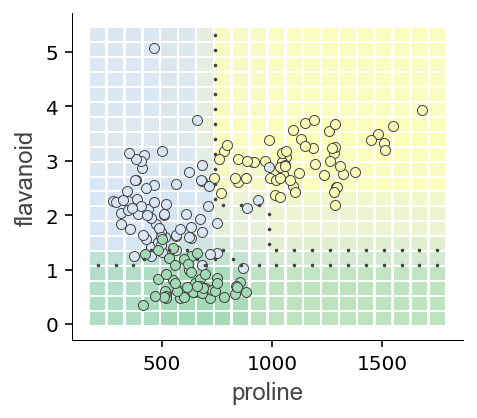

In [63]:
fig,ax = plt.subplots(1,1, figsize=(3.5,3))
crfviz_bivar(rf, X, y, ntiles=20, ax=ax, tile_fraction=.95, feature_names=['proline', 'flavanoid'])

## Titantic

In [64]:
df = pd.read_csv("../data/titanic/titanic.csv")
df['Sex'] = np.where(df['Sex']=='male', 0, 1)
df.head(2).T

,0,1
PassengerId,1,2
Survived,0,1
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,0,1
Age,22,38
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.2833


In [65]:
X, y = df.drop(['Survived','Name','Ticket','Cabin','Embarked'], axis=1), df['Survived']
X['Age_na'] = X['Age'].isna()
X['Age'] = X['Age'].fillna(X['Age'].median(skipna=True))

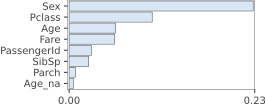

In [66]:
rf = RandomForestClassifier(n_estimators=20, min_samples_leaf=3, n_jobs=-1)
rf.fit(X, y)

I = importances(rf, X, y)
plot_importances(I)

In [67]:
X = X[['Age','Fare']]
rf = RandomForestClassifier(n_estimators=10, n_jobs=-1)
rf.fit(X, y)

RandomForestClassifier(n_estimators=10, n_jobs=-1)

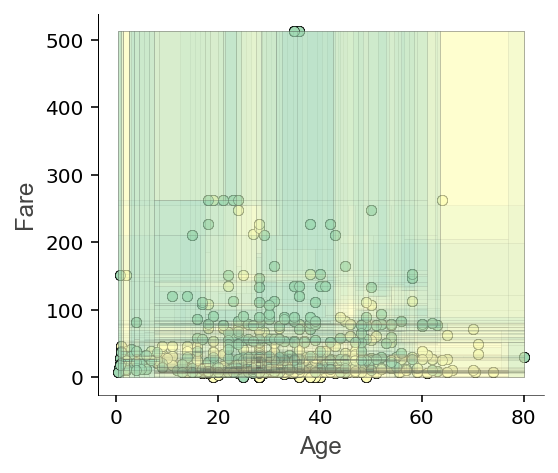

In [68]:
ctreeviz_bivar_fusion(rf.estimators_, X, y,
                      feature_names=['Age','Fare'], target_name="wine",
                      class_names=None,
                      alpha=.1)

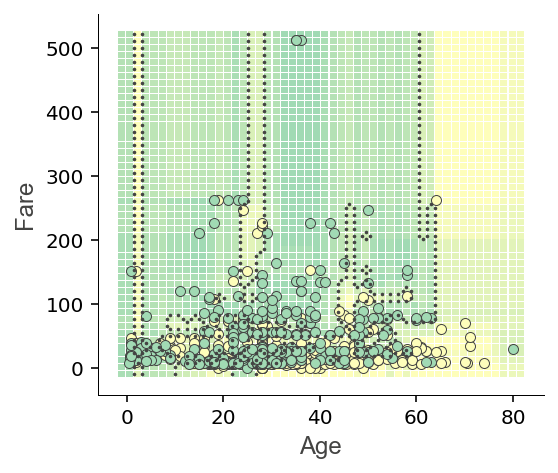

In [69]:
crfviz_bivar(rf, X.values, y, ntiles=50, feature_names=['Age','Fare'])

## Cancer

In [70]:
cancer = load_breast_cancer()

df = pd.DataFrame(data=cancer.data)
df.columns = [f'f{i}' for i in range(df.shape[1])]
df['y'] = cancer.target
df.head(3)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,y
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [71]:
X, y = df.drop('y',axis=1), df['y']

In [72]:
rf = RandomForestClassifier(n_estimators=20, min_samples_leaf=3, n_jobs=-1)
rf.fit(X, y)

I = importances(rf, X, y)[0:5]

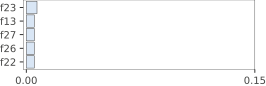

In [73]:
plot_importances(I)

In [74]:
X = df[['f27','f22']]

rf = RandomForestClassifier(n_estimators=30, min_samples_leaf=5, n_jobs=-1)
rf.fit(X, y)

RandomForestClassifier(min_samples_leaf=5, n_estimators=30, n_jobs=-1)

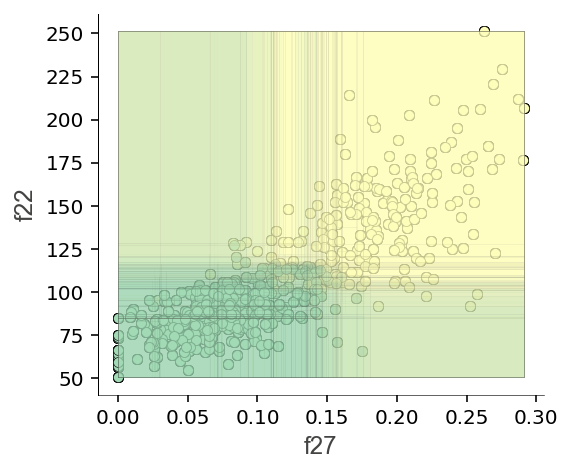

In [75]:
ctreeviz_bivar_fusion(rf.estimators_, X, y,
                      feature_names=['f27', 'f22'], target_name="cancer",
                      class_names=['not-cancer','cancer'],
                      alpha=.05)

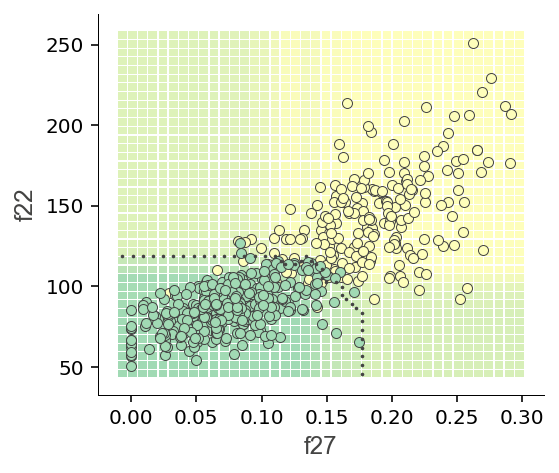

In [76]:
crfviz_bivar(rf, X.values, y, feature_names=['f27', 'f22'], ntiles=40)